Read data

In [ ]:
#import nvidia.cudnn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

2025-10-22 12:17:04.240852: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Shape x_train:
(50000, 32, 32, 3)

Number of dimensions:
4

Datatypes:
uint8

Shape x_test:
(10000, 32, 32, 3)


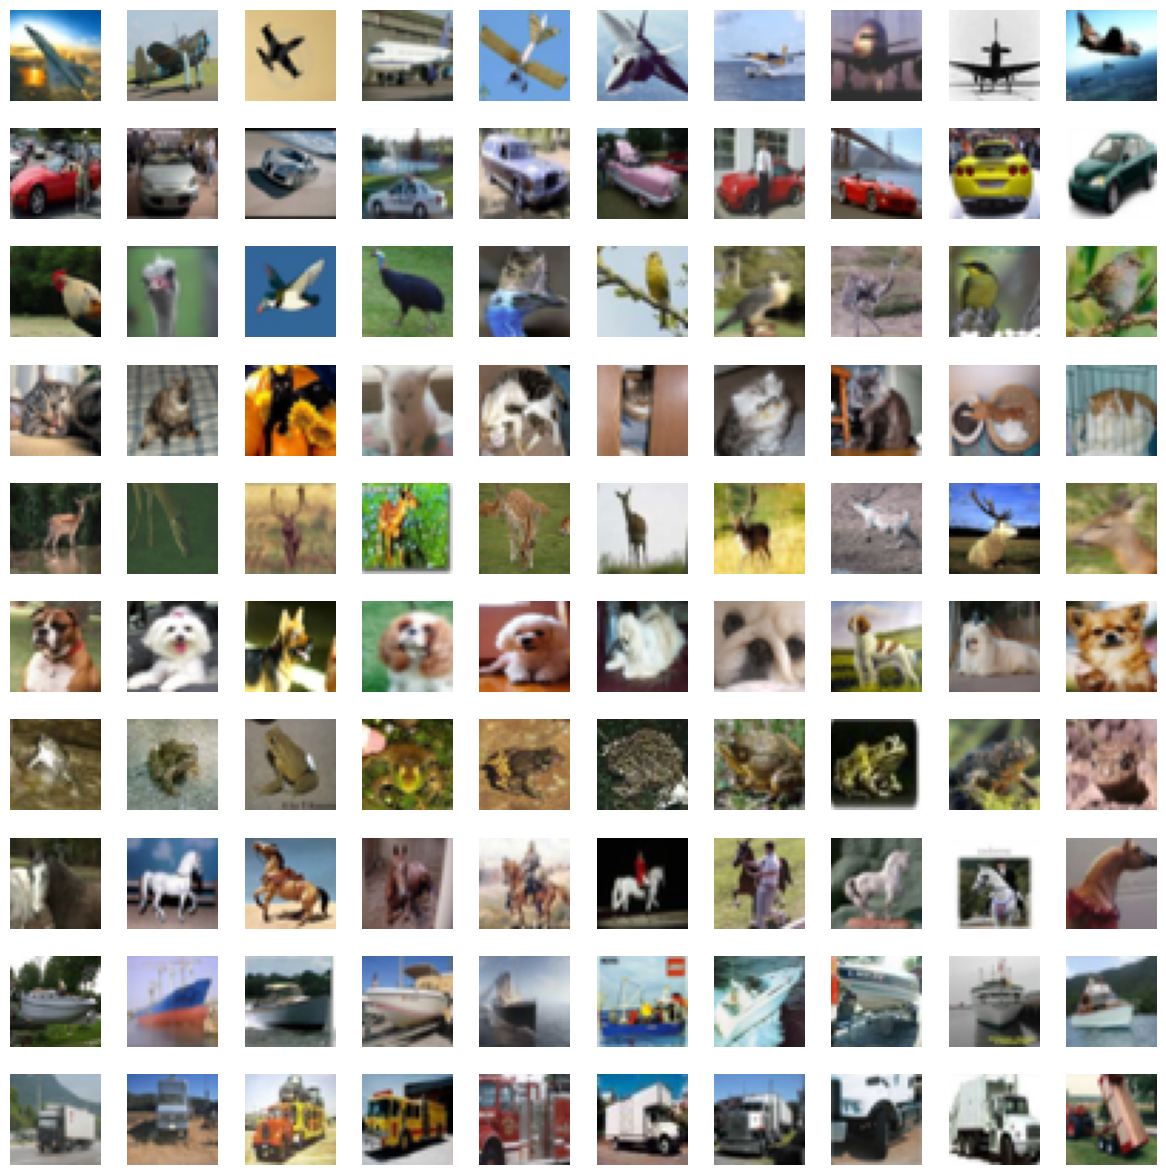

After reshaping:
(50000, 32, 32, 3, 1)
5
float32
(10000, 32, 32, 3, 1)
(50000, 10)
(10000, 10)


In [2]:
print("Shape x_train:")
print(x_train.shape)
print()
print("Number of dimensions:")
print(x_train.ndim)
print()
print("Datatypes:")
print(x_train.dtype)
print()
print("Shape x_test:")
print(x_test.shape)


## Visualisize images
# read call lables
class_names = np.unique(y_train)

# Set up the figure for a 10x10 plot
fig, axes = plt.subplots(10, 10, figsize=(15, 15))

for i in range(10):
    # Get indices for images of class i
    indices = np.where(y_train == i)[0]
    # Randomly select 10 indices from the class
    random_indices = np.random.choice(indices, size=10, replace=False)
    
    for j, idx in enumerate(random_indices):
        # Plot the image in the appropriate subplot
        axes[i, j].imshow(x_train[idx])
        axes[i, j].axis('off')  # Hide axis ticks
        if j == 0:
            axes[i, j].set_ylabel(class_names[i], fontsize=12)  # Label the class

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

# converts the data type of the x_train array to float32
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print('After reshaping:')

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)
print(x_test.shape)

# converts target to categorical data
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

In [3]:
from keras.backend import clear_session
clear_session()

In [4]:
# init model
vgg_model = Sequential()

# add Convolutional-Layer 
vgg_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
vgg_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# add MaxPooling-Layer
vgg_model.add(MaxPooling2D((2, 2), padding='same'))


# add 2 more Convolutional-Layer 
vgg_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vgg_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

# add MaxPooling-Layer
vgg_model.add(MaxPooling2D((2, 2), padding='same'))

# Flatten output
vgg_model.add(Flatten())

# add Dense-Layer with 128 units
vgg_model.add(Dense(128, activation='relu'))

# add classification layer (10 classes)
vgg_model.add(Dense(10, activation='softmax'))

# model summary
vgg_model.summary()

/home/georg/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1761128232.589578    1149 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6073 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,310,154 (5.00 MB)

 Trainable params: 1,310,154 (5.00 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train settings
batch_size = 512
num_classes = 10
epochs = 50

# compile the model
vgg_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train model
history_m3 = vgg_model.fit(x_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))


# predict output for test data
predictions = vgg_model.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

# print confusion matrix
gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

Epoch 1/50


2025-10-22 12:17:15.523404: I external/local_xla/xla/service/service.cc:163] XLA service 0x77c004008dd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-22 12:17:15.523443: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2025-10-22 12:17:15.555571: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-22 12:17:15.672453: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91400
2025-10-22 12:17:16.126829: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[512,64,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[512,3,32,32]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_

 3/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.0928 - loss: 2.3030

I0000 00:00:1761128240.449159    2248 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1109 - loss: 2.2971

2025-10-22 12:17:24.655449: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[336,64,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[336,3,32,32]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-10-22 12:17:24.683224: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[336,64,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[336,64,32,32]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="_

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.1110 - loss: 2.2970

2025-10-22 12:17:28.498852: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[512,64,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[512,3,32,32]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-10-22 12:17:28.538083: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[512,64,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[512,64,32,32]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="_

98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - accuracy: 0.1240 - loss: 2.2912 - val_accuracy: 0.1501 - val_loss: 2.2769
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.1720 - loss: 2.2445 - val_accuracy: 0.2181 - val_loss: 2.1876
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.2490 - loss: 2.1139 - val_accuracy: 0.2699 - val_loss: 2.0457
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.2781 - loss: 2.0352 - val_accuracy: 0.3148 - val_loss: 1.9600
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.3115 - loss: 1.9529 - val_accuracy: 0.3352 - val_loss: 1.8838
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.3352 - loss: 1.8950 - val_accuracy: 0.3468 - val_loss: 1.8676
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.3544 - loss: 1.8373 - val_accuracy: 0.3781 - val_loss: 1.7604
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.3734 - loss: 1.7854 - val_accuracy: 0.3906 - val_loss: 

In [ ]:
# plot entropy loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_m3.history['loss'], color='blue', label='train')
plt.plot(history_m3.history['val_loss'], color='red', label='val')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_m3.history['accuracy'], color='green', label='train')
plt.plot(history_m3.history['val_accuracy'], color='red', label='val')
plt.show()

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = vgg_model.evaluate(x_test, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy:.3f}')
print(f'Test loss: {test_loss:.3f}')  